## Creating features
In this chapter, you will work with a dataset called sales_df, which contains information on advertising campaign expenditure across different media types, and the number of dollars generated in sales for the respective campaign. The dataset has been preloaded for you. 

You will use the advertising expenditure as features to predict sales values, initially working with the "radio" column. However, before you make any predictions you will need to create the feature and target arrays, reshaping them to the correct format for scikit-learn.

In [1]:
import numpy as np
import pandas as pd

sales_df = pd.read_csv('./data/advertising_and_sales_clean.csv')

# Create X from the radio column's values
X = sales_df["radio"].values

# Create y from the sales column's values
y = sales_df["sales"].values

# Reshape X
X = X.reshape(-1,1)

# Check the shape of the features and targets
print(X.shape, y.shape)

(4546, 1) (4546,)


In [2]:
sales_df.head()

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


# Building a linear regression model
Now you have created your feature and target arrays, you will train a linear regression model on all feature and target values.

As the goal is to assess the relationship between the feature and target values there is no need to split the data into training and test sets.

Use X and y from previous cell

In [4]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression
# Create a LinearRegression model
reg = LinearRegression()
# Fit the model to the data
reg.fit(X, y)
# Predict sales values using X, storing as predictions
predictions = reg.predict(X)

print(predictions[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


# Visualizing a linear regression model
Now you have built your linear regression model and trained it using all available observations, you can visualize how well the model fits the data. This allows you to interpret the relationship between radio advertising expenditure and sales values.

The variables X, an array of radio values, y, an array of sales values, and predictions, an array of the model's predicted values for y given X, have all been preloaded for you from the previous exercise.

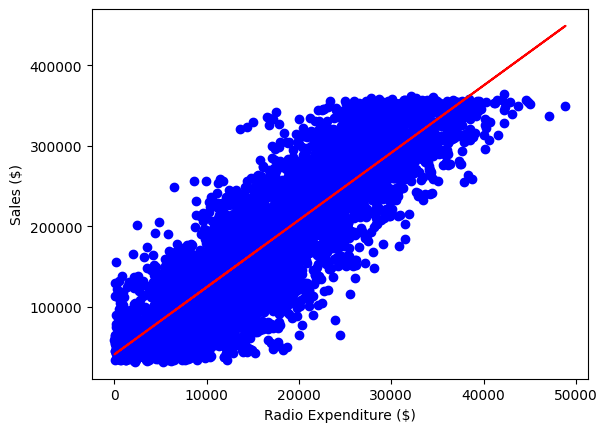

In [5]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create scatter plot visualizing `y` against `X`, with observations in blue
plt.scatter(X, y, color="blue")

# Draw a red line plot dipslaying the predctions against `X`
plt.plot(X, predictions, color="red")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")
plt.show()

# The basics of Linear regresion
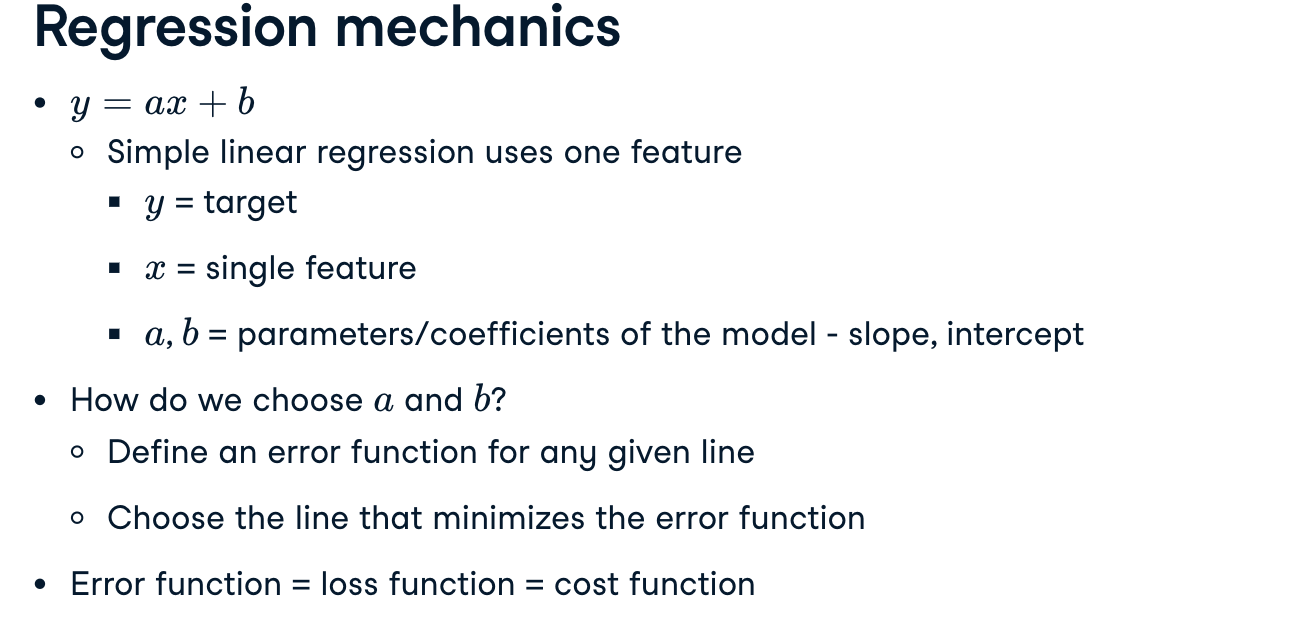
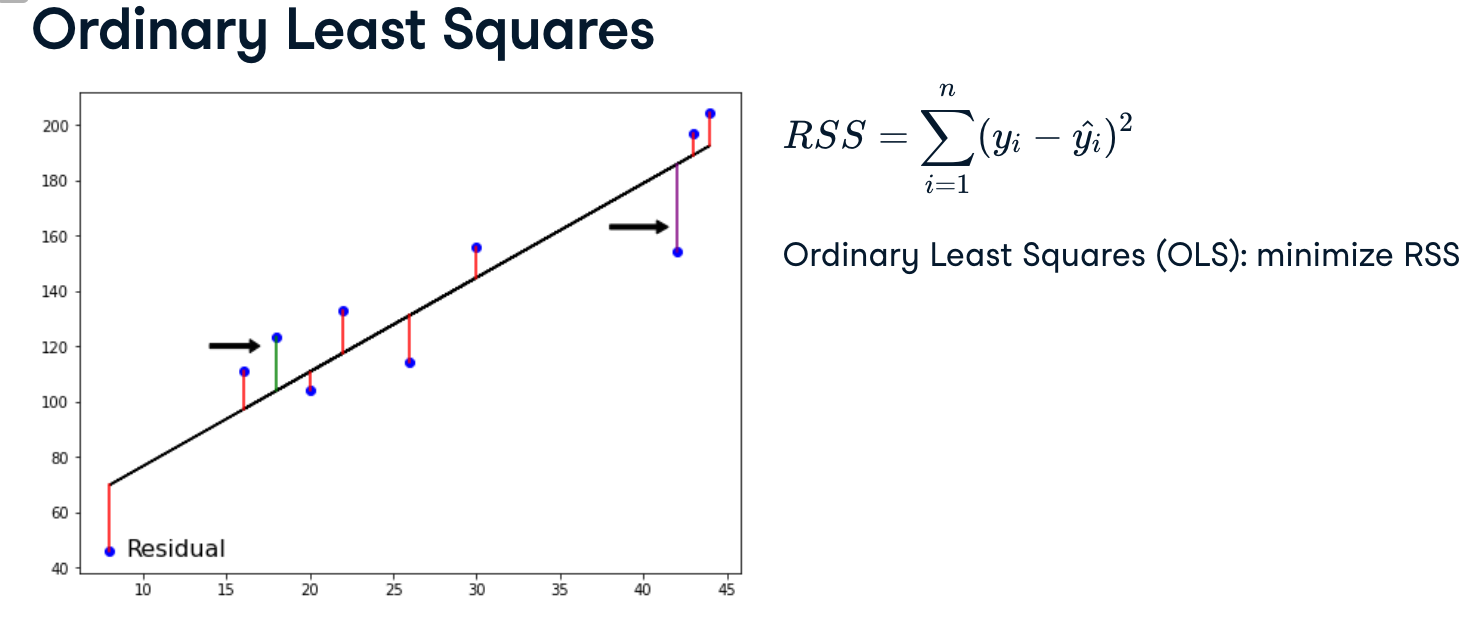
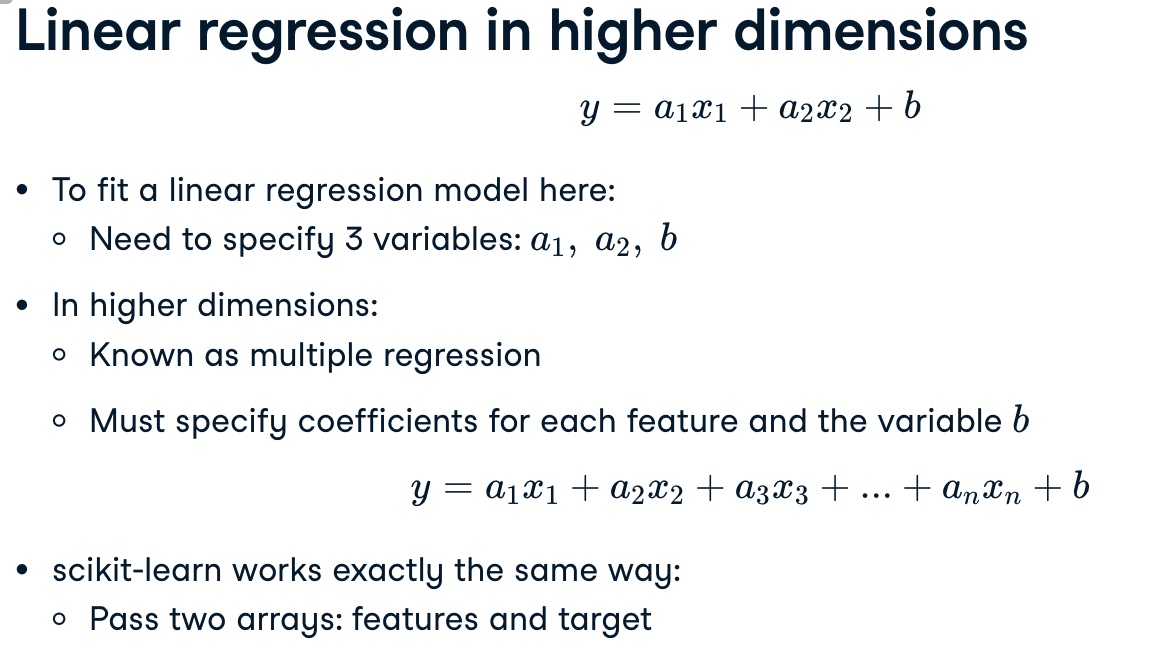
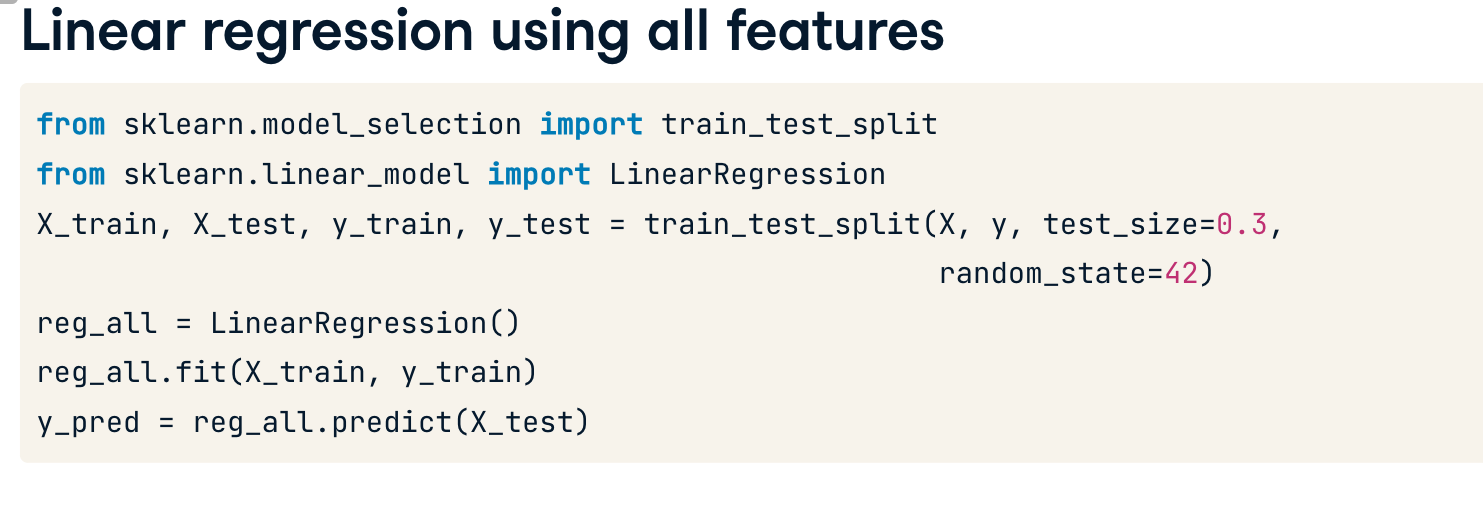
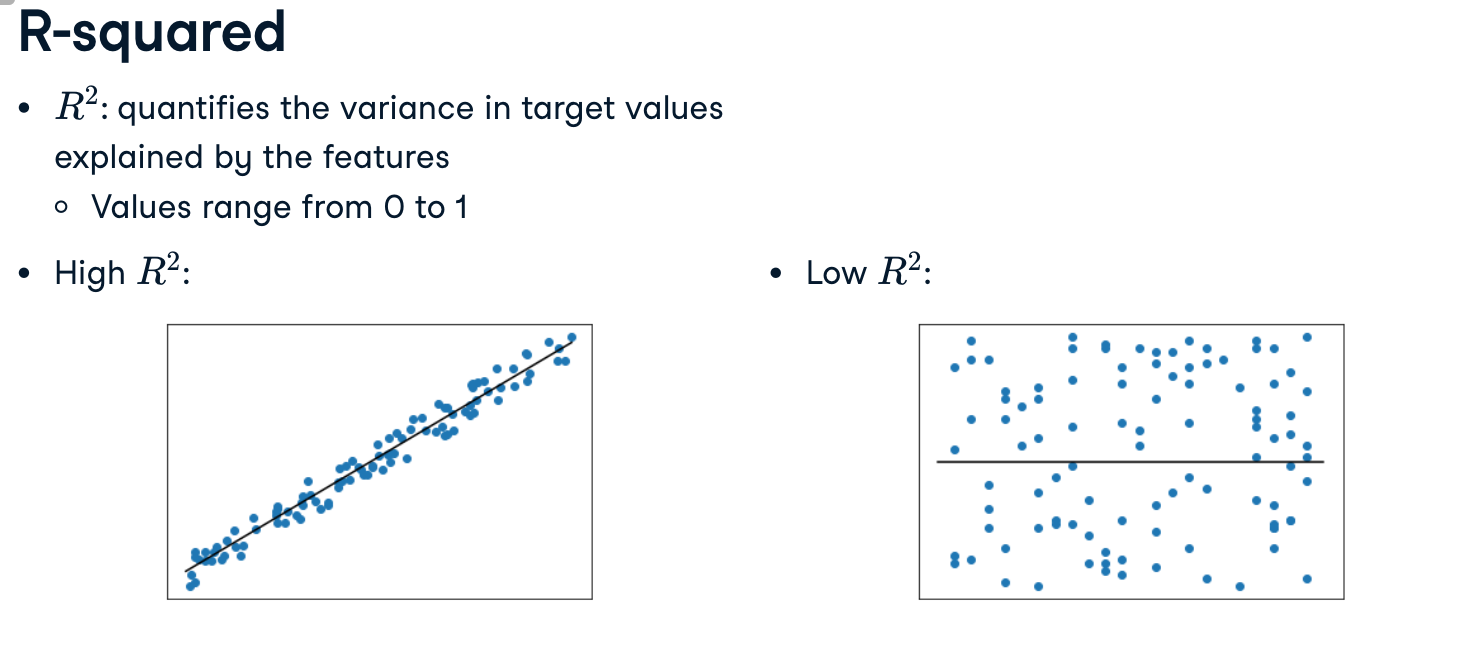
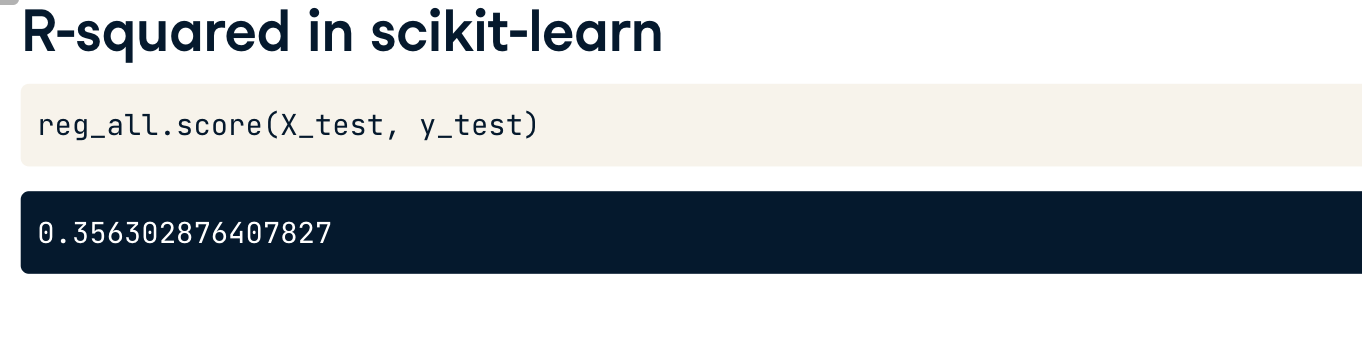
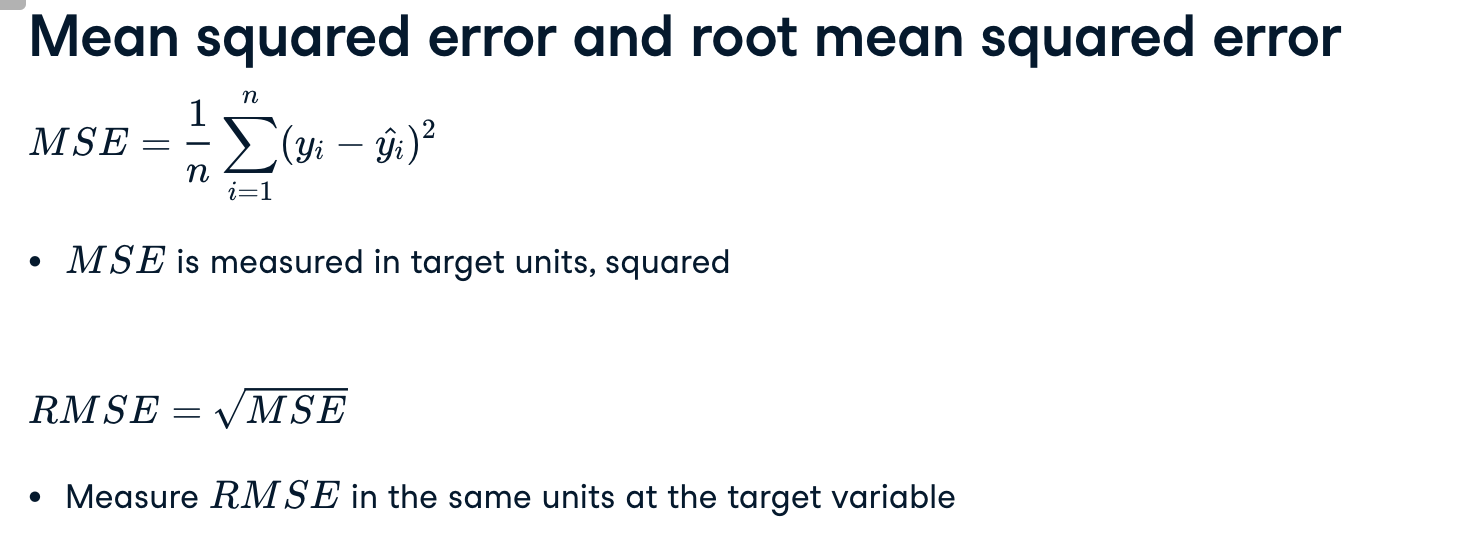
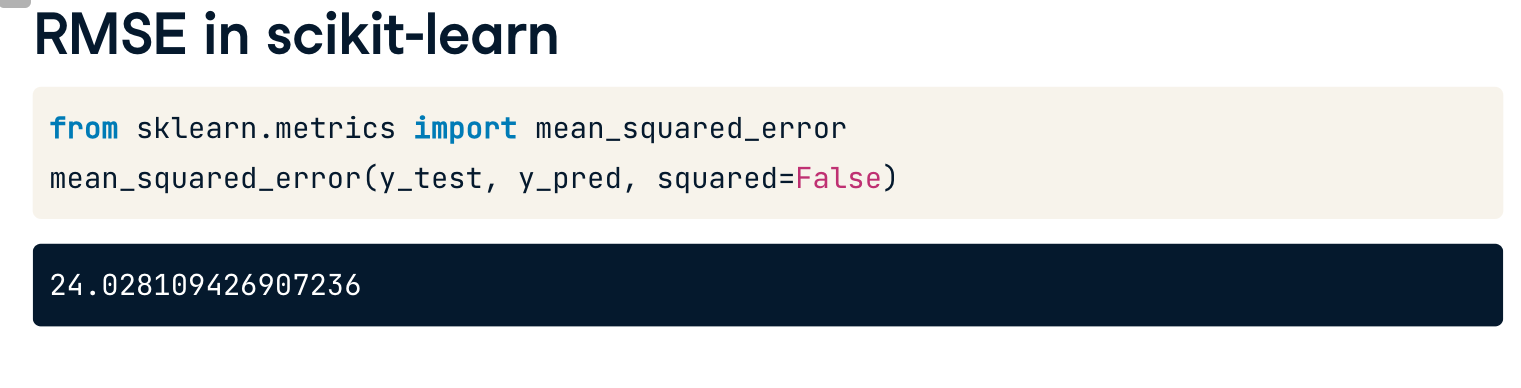

## Fit and predict for regression
Now you have seen how linear regression works, your task is to create a multiple linear regression model using all of the features in the sales_df dataset, which has been preloaded for you.

In [13]:
sales_df.head()

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


In [14]:
# import train_test_split and LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# create X or all features but the target (remove the target column)
X = sales_df.drop(["sales", "influencer"], axis=1).values

# create y or the target
y = sales_df["sales"].values

# create train test split sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# instantiate the model
reg = LinearRegression()

# fit the model to the training data
reg.fit(X_train, y_train)

# make predictions on the test data
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))


# evaluate the model
# print("R2 score: ", r2_score(y_test, y_pred))

Predictions: [53176.66154234 70996.19873235], Actual Values: [55261.28 67574.9 ]


# Regression performance
Now you have fit a model, reg, using all features from sales_df, and made predictions of sales values, you can evaluate performance using some common regression metrics.

The variables X_train, X_test, y_train, y_test, and y_pred, along with the fitted model, reg, all from the last exercise, have been preloaded for you.

Your task is to find out how well the features can explain the variance in the target values, along with assessing the model's ability to make predictions on unseen data.

In [15]:
# import mean_squared_error
from sklearn.metrics import mean_squared_error

# compute R-squared
r_squared = reg.score(X_test, y_test)

# compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.9990152104759368
RMSE: 2944.433199600125


# Cross-validation